# 1. 그래프 준비
- 랜덤 그래프

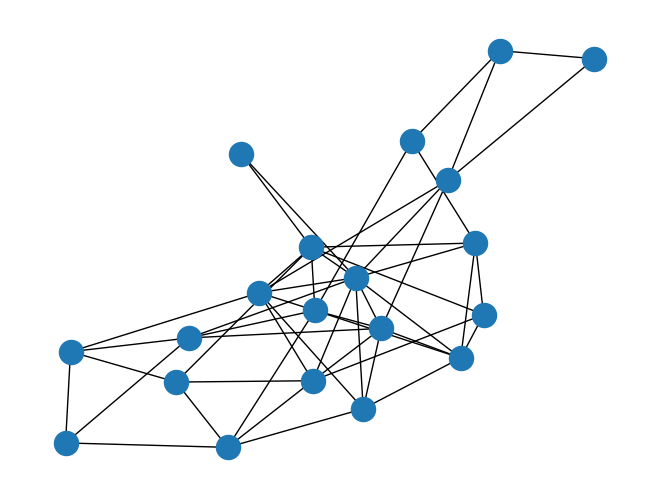

In [ ]:
import networkx as nx

G = nx.gnm_random_graph(20, 50)
nx.draw(G)

- 다이내믹스의 초기 상태
 - 모든 노드 상태 지정: asleep
 - 각 노드의 다이내믹스는 이웃과 독립적인 상황 가정

In [ ]:
def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = 'asleep'
    return state

In [ ]:
initial_state(G)

{0: 'asleep',
 1: 'asleep',
 2: 'asleep',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'asleep',
 10: 'asleep',
 11: 'asleep',
 12: 'asleep',
 13: 'asleep',
 14: 'asleep',
 15: 'asleep',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'asleep'}

- 상태 변환: awake 상태로 변환, 변환 확률

In [ ]:
import random

P_AWAKEN = 0.2
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if current_state[node] == 'asleep':
            if random.random() < P_AWAKEN:
                next_state[node] = 'awake'
    return next_state

In [ ]:
test_state = initial_state(G)
state_transition(G, test_state)

{9: 'awake', 14: 'awake', 18: 'awake'}

- simulation.py를 업로드 후 아래 내용 실행

In [ ]:
from simulation import Simulation

sim = Simulation(G, initial_state, state_transition, name='Simple Sim')

The `name` provided here is optional, it just for us to keep track of the images we'll generate later.

This Simulation object has several useful methods. The first of these is the `.state()` method, which returns a dictionary for the current state of the simulation:

In [ ]:
sim.state()

{0: 'asleep',
 1: 'asleep',
 2: 'asleep',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'asleep',
 10: 'asleep',
 11: 'asleep',
 12: 'asleep',
 13: 'asleep',
 14: 'asleep',
 15: 'asleep',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'asleep'}

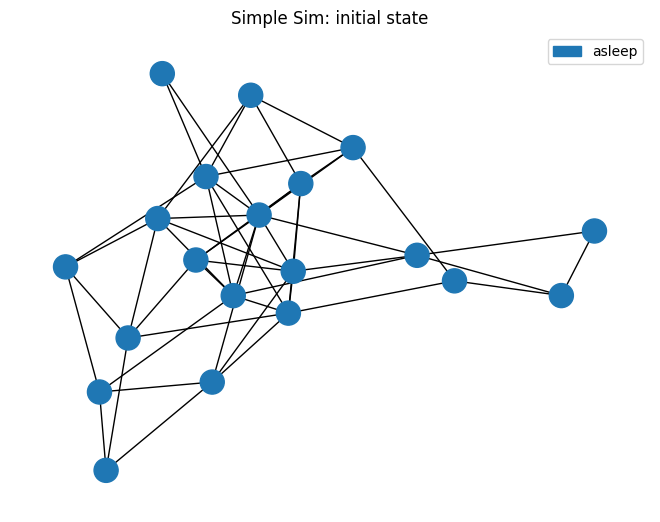

In [ ]:
sim.draw()

- 시뮬레이션 실행

In [ ]:
sim.run()

- transition function실행 횟수

In [ ]:
sim.steps

1

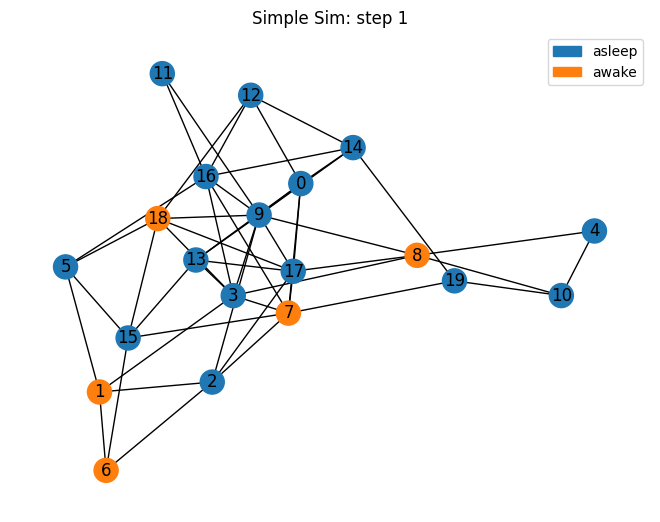

In [ ]:
sim.draw(with_labels=True)

In [ ]:
sim.state()

{0: 'asleep',
 1: 'awake',
 2: 'asleep',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'awake',
 7: 'awake',
 8: 'awake',
 9: 'asleep',
 10: 'asleep',
 11: 'asleep',
 12: 'asleep',
 13: 'asleep',
 14: 'asleep',
 15: 'asleep',
 16: 'asleep',
 17: 'asleep',
 18: 'awake',
 19: 'asleep'}

- 10번 실행

In [ ]:
sim.run(10)

In [ ]:
sim.steps

11

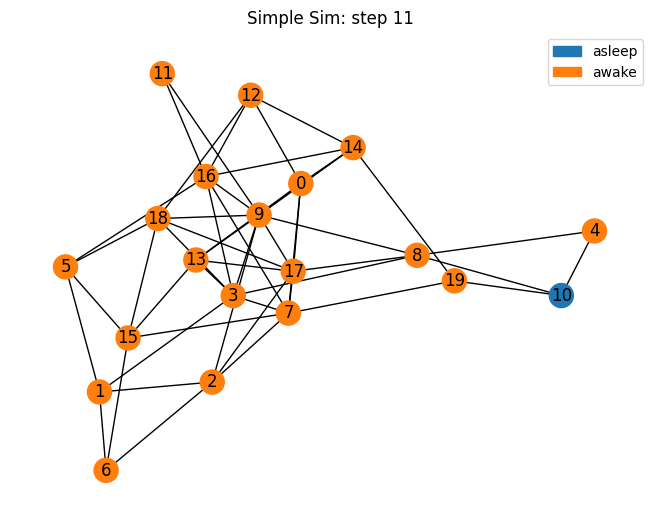

In [ ]:
sim.draw(with_labels=True)

- 결과 시각화

<Axes: title={'center': 'Simple Sim: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

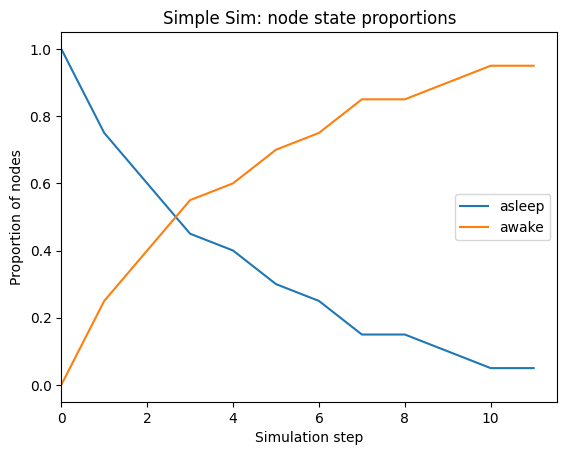

In [ ]:
sim.plot()

- 특정 단계에 대한 시각화

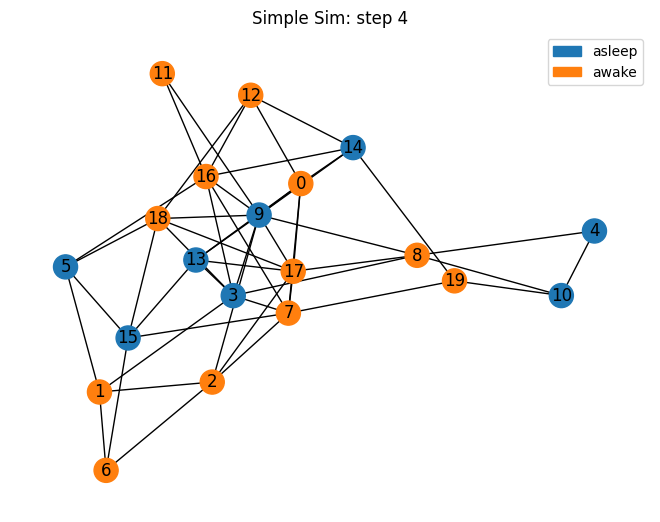

In [ ]:
sim.draw(4, with_labels=True)

In [ ]:
sim.state(4)

{0: 'awake',
 1: 'awake',
 2: 'awake',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'awake',
 7: 'awake',
 8: 'awake',
 9: 'asleep',
 10: 'asleep',
 11: 'awake',
 12: 'awake',
 13: 'asleep',
 14: 'asleep',
 15: 'asleep',
 16: 'awake',
 17: 'awake',
 18: 'awake',
 19: 'awake'}

- 상태 범위를 지정

<Axes: title={'center': 'Simple Sim: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

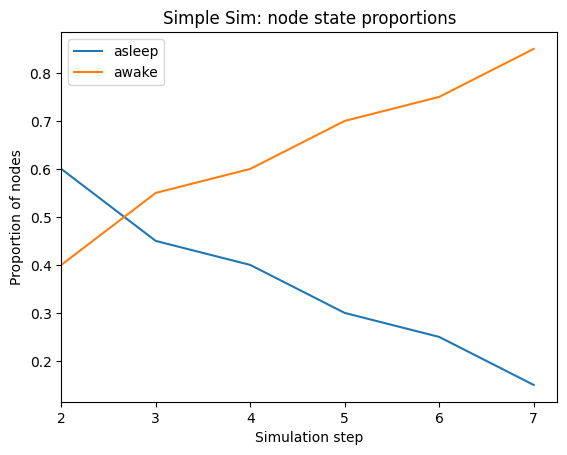

In [ ]:
sim.plot(min_step=2, max_step=8)

# 2. Voter model
- 네트워크 오피니언 다이내믹스
- 그래프 생성

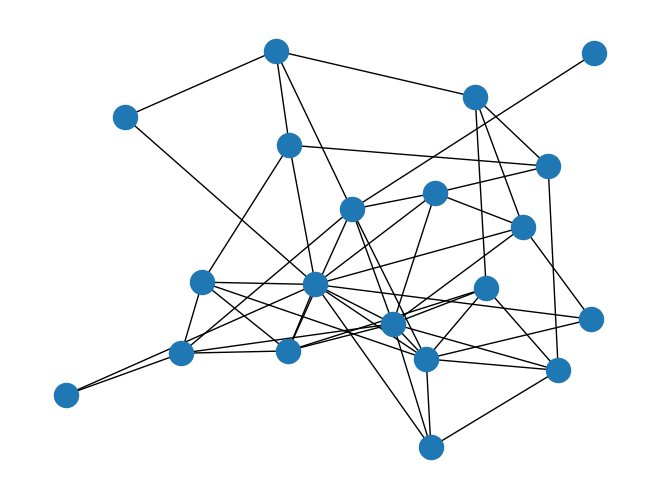

In [ ]:
import networkx as nx

G = nx.gnm_random_graph(20, 50)
nx.draw(G)

- 랜덤하게 A, D 두 상태 중 하나를 부여

In [ ]:
import random
import string

def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = random.choice('ABCD')
    return state

In [ ]:
initial_state(G)

{0: 'B',
 1: 'D',
 2: 'C',
 3: 'A',
 4: 'D',
 5: 'D',
 6: 'C',
 7: 'C',
 8: 'A',
 9: 'D',
 10: 'A',
 11: 'C',
 12: 'B',
 13: 'A',
 14: 'B',
 15: 'D',
 16: 'B',
 17: 'D',
 18: 'C',
 19: 'D'}

- State transition: 랜덤하게 이웃을 선택하여 오피니언이 영향을 미침
* 그래프 각 노드
  * 랜덤하게 이웃 선택
  * 이웃 상태와 동일하게 해당 노드 상태 변경

In [ ]:
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            next_state[node] = current_state[neighbor]
    return next_state

In [ ]:
test_state = initial_state(G)
state_transition(G, test_state)

{0: 'A',
 1: 'A',
 2: 'A',
 3: 'D',
 4: 'B',
 5: 'D',
 6: 'D',
 7: 'A',
 8: 'D',
 9: 'D',
 10: 'B',
 11: 'A',
 12: 'D',
 13: 'D',
 14: 'D',
 15: 'D',
 16: 'C',
 17: 'A',
 18: 'A',
 19: 'A'}

- simulation 함수 사용

In [ ]:
import matplotlib.pyplot as plt

sim = Simulation(G, initial_state, state_transition, name='Voter Model')

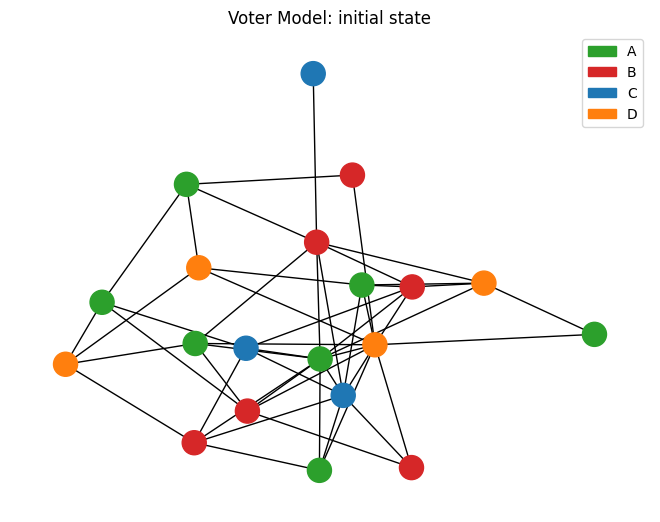

In [ ]:
sim.draw(labels='ABCD')

In [ ]:
sim.run(40)

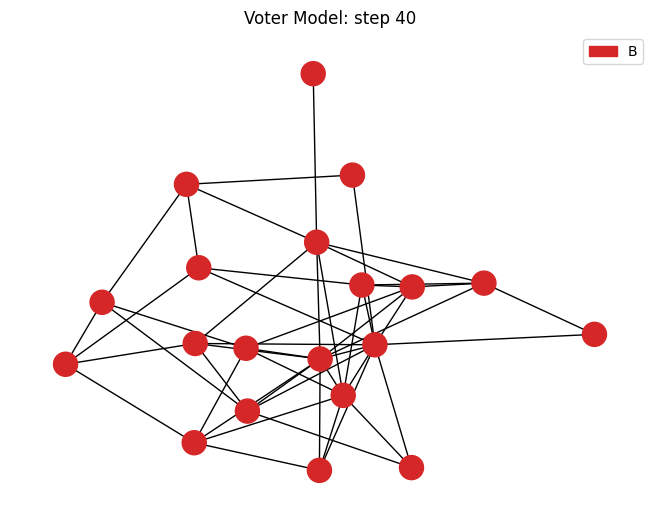

In [ ]:
sim.draw()

- 결과 시각화

<Axes: title={'center': 'Voter Model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

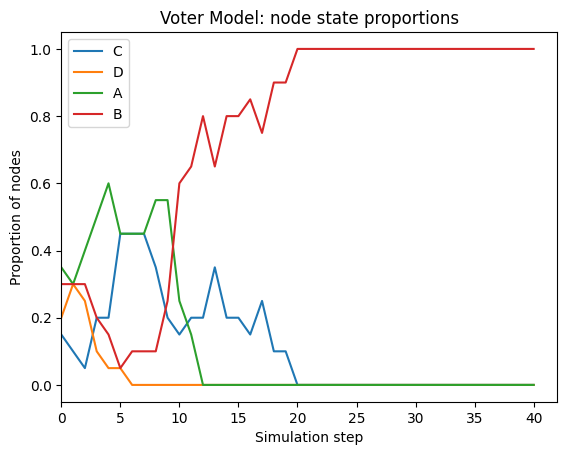

In [ ]:
sim.plot()

- 장기간 실험 시, long-term steady state에 도달

# 3. SIS model
- 네트워트 다이내믹스의 주요 모형

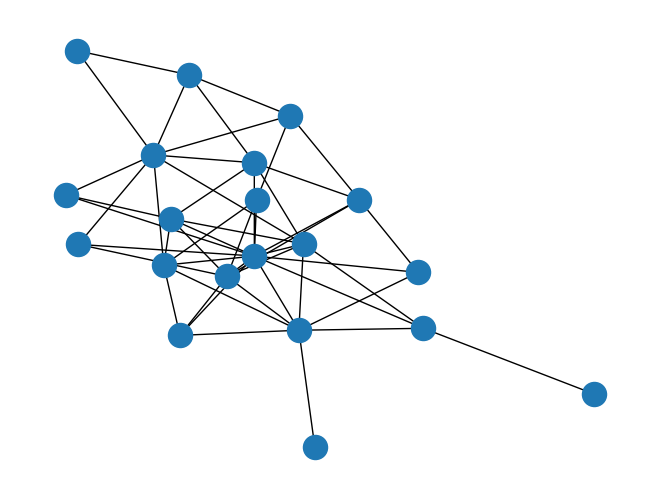

In [ ]:
import networkx as nx
G = nx.gnm_random_graph(20, 50)
nx.draw(G)

- 초기 상태: 모두 S 상태이며, 한 노드만 I상태(patient zero)

In [ ]:
import random

def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = 'S'

    patient_zero = random.choice(list(G.nodes))
    state[patient_zero] = 'I'
    return state

In [ ]:
initial_state(G)

{0: 'S',
 1: 'S',
 2: 'S',
 3: 'S',
 4: 'S',
 5: 'S',
 6: 'S',
 7: 'S',
 8: 'S',
 9: 'S',
 10: 'S',
 11: 'S',
 12: 'S',
 13: 'S',
 14: 'S',
 15: 'I',
 16: 'S',
 17: 'S',
 18: 'S',
 19: 'S'}

- State transition
 - $\beta$ : S에서 I로의 전환 확률
 - $\mu$ : I에서 S로의 전환 확률

* 그래프 각 노드
  * 노드가 I 상태인 경우
    * 노드가 $\mu$의 확률로 S로 전환
  * 노드가 S 상태인 경우
    * 각 이웃 노드에 대해
      * 이웃이 I 상태이면, 해당 노드가 $\beta$의 확률로 I로 변환

In [ ]:
MU = 0.5
BETA = 0.5

def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if current_state[node] == 'I':
            if random.random() < MU:
                next_state[node] = 'S'
        else: # current_state[node] == 'S'
            for neighbor in G.neighbors(node):
                if current_state[neighbor] == 'I':
                    if random.random() < BETA:
                        next_state[node] = 'I'

    return next_state

In [ ]:
test_state = initial_state(G)
state_transition(G, test_state)

{7: 'S', 16: 'I', 19: 'I'}

- Simulation 이용

In [ ]:
sim = Simulation(G, initial_state, state_transition, name='SIS model')

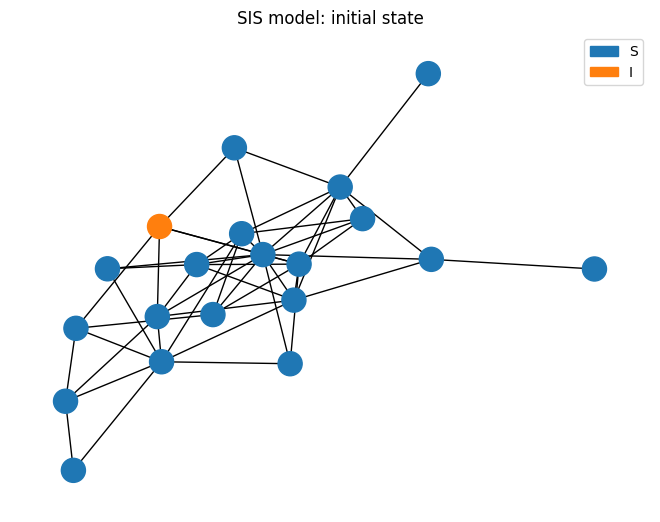

In [ ]:
sim.draw()

In [ ]:
sim.run(25)

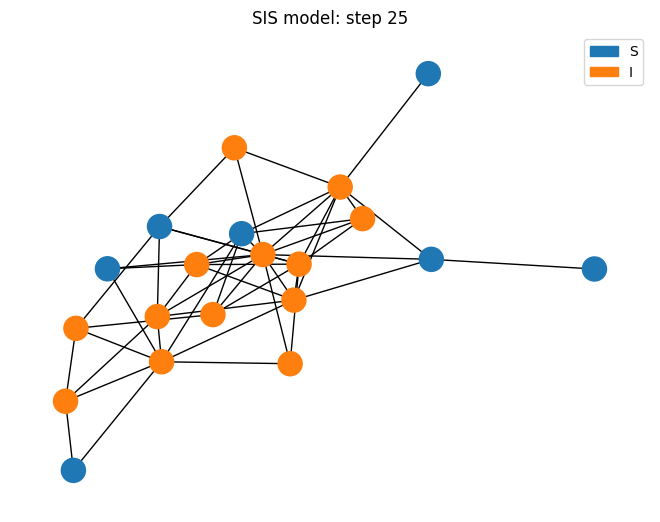

In [ ]:
sim.draw()

<Axes: title={'center': 'SIS model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

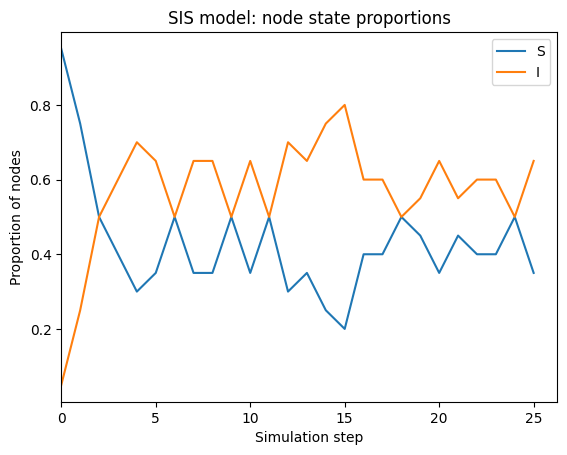

In [ ]:
sim.plot()

#4. Dynetx 활용

- DyNetX: a library for dynamic network modeling
 - networkx확장
 - [``DyNetx``](http://dynetx.readthedocs.io/en/latest/): time-evolving graphs
 - dynamic network: 엣지 또는 노드와 관련된 시간 정보를 갖는 topology
 - Snapshot Graphs
 - Interaction Networks

In [ ]:
!pip install dynetx

#4.1. Snapshot Graphs
> A ``Snapshot Graph`` $G_t$ is defined by a temporally ordered set $⟨G_1, G_2\dots G_t⟩$ of static graphs where each snapshot $G_i = (V_i, E_i)$ is univocally identified by the sets of nodes $V_i$ and edges $E_i$.

- 일정한 간격으로 네트워크 분석
- 주요 간격으로 스냅샷 구성

- [``DyNetx``](http://dynetx.readthedocs.io/en/latest/) allows to (among the other things): List the snapshots of the loaded graph

- Interaction networks
 - 시간에 따라 노드와 엣지가 등장하거나 사라질 수 있는 다이나믹 구조
 - ``Intercation network`` 라는 용어가 사용되며, 다이나믹 네트워크가 계속되는 엣지들의 흐름으로 이해됨

> An ``interaction network`` is a graph $G = (V, E, T)$ where: $V$ is a set of triplets of the form $(v, t_s, t_e)$, with $v$ a vertex of the graph and $t_s$, $t_e \in T$ are respectively the birth and death timestamps of the corresponding vertex (with $t_s \leq t_e$); $E$ is a set of quadruplets $(u, v, t_s, t_e)$, with $u, v \in V$ are vertices of the graph and $t_s,t_e \in T$ are respectively the birth and death timestamps of the corresponding edge (with $t_s \leq t_e$)

In [ ]:
import dynetx as dn
import networkx as nx
import random

def read_net(filename):
    g = nx.Graph()
    with open(filename) as f:
        f.readline()
        for l in f:
            l = l.split(",")
            g.add_edge(l[0], l[1])
    return g

g = dn.DynGraph() # empty dynamic graph

- Dynamic network 만들기: 시간에 따라 엣지 추가

In [ ]:
for t in range(1, 9):
    er = read_net(f'got-s{t}-edges.csv')
    g.add_interactions_from(er.edges, t=t)

 - 스냅샷 id 리스트

In [ ]:
g.temporal_snapshots_ids()

[1, 2, 3, 4, 5, 6, 7, 8]

- 각 스냅샷은 id로 구분

In [ ]:
g1 = g.time_slice(1)

In [ ]:
type(g1), g1.number_of_nodes(), g1.number_of_edges()

(dynetx.classes.dyngraph.DynGraph, 126, 549)

- id를 활용한 슬라이싱

In [ ]:
g0_3 = g.time_slice(0, 3)

In [ ]:
type(g0_3), g0_3.number_of_nodes(), g0_3.number_of_edges(), g0_3.interactions_per_snapshots()

(dynetx.classes.dyngraph.DynGraph, 237, 1182, {1: 78.5, 2: 79.0})

- id별 슬라이스된 엣지로 networkx 그래프 생성

In [ ]:
g1_flat = nx.Graph(g1.edges())

In [ ]:
type(g1_flat), g1_flat.number_of_nodes(), g1_flat.number_of_edges()

(networkx.classes.graph.Graph, 126, 549)

- Dynamic network measures

 - Inter event time (Global): Distribution of inter event time (e.g., how much time before a new interaction appears in the graph)

In [ ]:
r = g.inter_event_time_distribution()
print(f"Number interactions: temporal distance\t{r}")

Number interactions: temporal distance	{0: 3307, 1: 8}


- Inter event time (Node): Distribution of inter event time (e.g., how much time before a new interaction involving a specific node appears in the graph)

In [ ]:
r = g.inter_event_time_distribution("ARYA")
print(f"Number interactions: temporal distance\t{r}")

Number interactions: temporal distance	{0: 137, 1: 8}


- Inter event time (Edge): Distribution of inter event time (e.g., how much time before a new interaction among two nodes, u and v, appears in the graph)

In [ ]:
u = 'JON'
v = 'ARYA'

In [ ]:
r = g.inter_event_time_distribution(u, v)
print(f"Number interactions: temporal distance\t{r}")

Number interactions: temporal distance	{6: 1, 1: 1}


- Degree: 시간에 따라 측정

In [ ]:
g.degree(t=2)['ARYA'] # degree of node 0 at time t=2

27

- Coverage: The ratio of existing nodes w.r.t. the possible ones.

In [ ]:
g.coverage()

0.2977216748768473

- Temporal network density: fraction of possible interactions that do exist in the temporal network.

In [ ]:
g.density()

0.06686633244351846

- Path analysis: Computes the time respecting paths among u and v within [start, stop]

In [ ]:
import dynetx.algorithms as al
paths = al.time_respecting_paths(g, "GENDRY", "GREY_WORM", start=1, end=5)

In [ ]:
p = paths[0] # example of identified paths. Each list element is a tuple of the form (from, to, time)
p

[('GENDRY', 'NED', 1),
 ('NED', 'ROBERT', 2),
 ('ROBERT', 'BARRISTAN', 3),
 ('BARRISTAN', 'GREY_WORM', 4)]

In [ ]:
al.path_duration(p), al.path_length(p)

(3, 4)

- 다양한 유형의 경로

In [ ]:
annotated = al.annotate_paths(paths)

In [ ]:
annotated['shortest']

[[('GENDRY', 'NED', 1), ('NED', 'TYRION', 2), ('TYRION', 'GREY_WORM', 5)],
 [('GENDRY', 'NED', 1), ('NED', 'TYRION', 3), ('TYRION', 'GREY_WORM', 5)],
 [('GENDRY', 'NED', 1), ('NED', 'TYRION', 4), ('TYRION', 'GREY_WORM', 5)],
 [('GENDRY', 'VARYS', 1), ('VARYS', 'TYRION', 2), ('TYRION', 'GREY_WORM', 5)],
 [('GENDRY', 'VARYS', 1), ('VARYS', 'TYRION', 3), ('TYRION', 'GREY_WORM', 5)],
 [('GENDRY', 'VARYS', 1),
  ('VARYS', 'DAENERYS', 4),
  ('DAENERYS', 'GREY_WORM', 5)],
 [('GENDRY', 'VARYS', 1), ('VARYS', 'JORAH', 4), ('JORAH', 'GREY_WORM', 5)],
 [('GENDRY', 'VARYS', 1),
  ('VARYS', 'BARRISTAN', 4),
  ('BARRISTAN', 'GREY_WORM', 5)],
 [('GENDRY', 'VARYS', 1), ('VARYS', 'TYRION', 4), ('TYRION', 'GREY_WORM', 5)],
 [('GENDRY', 'ARYA', 1), ('ARYA', 'TYRION', 2), ('TYRION', 'GREY_WORM', 5)],
 [('GENDRY', 'NED', 2), ('NED', 'TYRION', 3), ('TYRION', 'GREY_WORM', 5)],
 [('GENDRY', 'NED', 2), ('NED', 'TYRION', 4), ('TYRION', 'GREY_WORM', 5)],
 [('GENDRY', 'TYWIN', 2), ('TYWIN', 'TYRION', 3), ('TYRION

In [ ]:
annotated['fastest']

[[('GENDRY', 'TYWIN', 3), ('TYWIN', 'TYRION', 4), ('TYRION', 'GREY_WORM', 5)],
 [('GENDRY', 'TYWIN', 3), ('TYWIN', 'TYRION', 4), ('TYRION', 'GREY_WORM', 5)]]

In [ ]:
annotated['shortest_fastest']

[[('GENDRY', 'TYWIN', 3), ('TYWIN', 'TYRION', 4), ('TYRION', 'GREY_WORM', 5)]]

In [ ]:
annotated['fastest_shortest']

[[('GENDRY', 'TYWIN', 3), ('TYWIN', 'TYRION', 4), ('TYRION', 'GREY_WORM', 5)]]

In [ ]:
annotated['foremost']

[[('GENDRY', 'NED', 1),
  ('NED', 'ROBERT', 2),
  ('ROBERT', 'BARRISTAN', 3),
  ('BARRISTAN', 'GREY_WORM', 4)],
 [('GENDRY', 'NED', 1),
  ('NED', 'ROBERT', 2),
  ('ROBERT', 'DAENERYS', 3),
  ('DAENERYS', 'GREY_WORM', 4)],
 [('GENDRY', 'NED', 1),
  ('NED', 'ROBERT', 2),
  ('ROBERT', 'JORAH', 3),
  ('JORAH', 'GREY_WORM', 4)]]